# Data Cleaning, Describing, and Visualization


### Step 1 - Get your environment setup¶

1. Install Git on your computer and fork the class repository on Github.
2. Install Anaconda and get it working.

### Step 2 - Explore Datasets¶

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!



# File Source 1: CSV - Baseball 

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  collections

In [3]:
names = ['ab_id','batter_id', 'event', 'g_id', 'inning', 'p_score', 'p_throws', 'pitcher_id', 'stand', 'top']
dtype={'ab_id': int}
atbats = pd.read_csv("/Users/alexhumble/Downloads/mlb-pitch-data-20152018/atbats.csv",
             low_memory=False,  header = None, names=names)

print(atbats.head())

          ab_id  batter_id      event         g_id  inning  p_score  p_throws  \
0         ab_id  batter_id      event         g_id  inning  p_score  p_throws   
1  2015000001.0     572761  Groundout  201500001.0       1        0         L   
2  2015000002.0     518792     Double  201500001.0       1        0         L   
3  2015000003.0     407812     Single  201500001.0       1        0         L   
4  2015000004.0     425509  Strikeout  201500001.0       1        0         L   

   pitcher_id  stand   top  
0  pitcher_id  stand   top  
1      452657      L  True  
2      452657      L  True  
3      452657      R  True  
4      452657      R  True  


In [4]:
atbats.isnull()
print(atbats.isnull().values.sum())

0


This was performed in order to see if there was any data missing

In [5]:
atbats.dtypes

ab_id         object
batter_id     object
event         object
g_id          object
inning        object
p_score       object
p_throws      object
pitcher_id    object
stand         object
top           object
dtype: object

In [6]:
atbats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740965 entries, 0 to 740964
Data columns (total 10 columns):
ab_id         740965 non-null object
batter_id     740965 non-null object
event         740965 non-null object
g_id          740965 non-null object
inning        740965 non-null object
p_score       740965 non-null object
p_throws      740965 non-null object
pitcher_id    740965 non-null object
stand         740965 non-null object
top           740965 non-null object
dtypes: object(10)
memory usage: 56.5+ MB


In [7]:
atbats['stand'].value_counts("R")

R        0.584953
L        0.415045
stand    0.000001
Name: stand, dtype: float64

This was done to see the % of hitters that bat left handed vs right handed. This is consistent with general basic lineups, where the average lineup has 3-4 left handed hitters and 5-6 right handed hitters

In [9]:
atbats['p_throws'].value_counts("R")

R           0.732129
L           0.267870
p_throws    0.000001
Name: p_throws, dtype: float64

The same analysis from above was performed to see the breakdown of pitchers and how many are left vs right handed. This data may be skewed however because right handed pitchers might pitch more as starters and therefore be included in more "event" sequences then left handed pitchers who may pitch in the bullpen more often.

In [11]:
right_hand = atbats['stand'] == "R"
atbatsR = atbats[right_hand]
print(atbatsR)

               ab_id batter_id             event         g_id inning p_score  \
3       2015000003.0    407812            Single  201500001.0      1       0   
4       2015000004.0    425509         Strikeout  201500001.0      1       0   
7       2015000007.0    624585         Groundout  201500001.0      1       1   
9       2015000009.0    516770         Groundout  201500001.0      1       1   
10      2015000010.0    425877         Strikeout  201500001.0      2       0   
13      2015000013.0    425794         Strikeout  201500001.0      2       0   
17      2015000017.0    592609         Strikeout  201500001.0      2       2   
18      2015000018.0    424325            Flyout  201500001.0      2       2   
21      2015000021.0    407812         Groundout  201500001.0      3       0   
22      2015000022.0    425509         Strikeout  201500001.0      3       0   
26      2015000026.0    624585         Strikeout  201500001.0      3       2   
28      2015000028.0    425877          

In [12]:
left_hand = atbats['stand'] == "L"
atbatsL = atbats[left_hand]
print(atbatsL)

               ab_id batter_id             event         g_id inning p_score  \
1       2015000001.0    572761         Groundout  201500001.0      1       0   
2       2015000002.0    518792            Double  201500001.0      1       0   
5       2015000005.0    571431         Strikeout  201500001.0      1       0   
6       2015000006.0    451594            Double  201500001.0      1       1   
8       2015000008.0    519203         Strikeout  201500001.0      1       1   
11      2015000011.0    543939              Walk  201500001.0      2       0   
12      2015000012.0    445055            Single  201500001.0      2       0   
14      2015000014.0    572761            Single  201500001.0      2       0   
15      2015000015.0    518792        Runner Out  201500001.0      2       0   
16      2015000016.0    458085            Double  201500001.0      2       2   
19      2015000019.0    452657         Strikeout  201500001.0      2       2   
20      2015000020.0    518792          

In [13]:
ninth_inning = atbats['inning'] == "9"
atbats9 = atbats[ninth_inning]
print(atbats9)

               ab_id batter_id             event         g_id inning p_score  \
69      2015000069.0    572761            Flyout  201500001.0      9       0   
70      2015000070.0    518792           Lineout  201500001.0      9       0   
71      2015000071.0    407812              Walk  201500001.0      9       0   
72      2015000072.0    425509            Flyout  201500001.0      9       0   
73      2015000073.0    458085         Strikeout  201500001.0      9       3   
74      2015000074.0    592609         Strikeout  201500001.0      9       3   
75      2015000075.0    570489         Strikeout  201500001.0      9       3   
138     2015000138.0    405395              Walk  201500002.0      9       4   
139     2015000139.0    459964          Forceout  201500002.0      9       4   
140     2015000140.0    501896  Grounded Into DP  201500002.0      9       4   
202     2015000202.0    542194         Strikeout  201500003.0      9       1   
203     2015000203.0    457727         S

In [15]:
first_inning = atbats['inning'] == "1"
atbats1 = atbats[first_inning]
print(atbats1)

               ab_id batter_id             event         g_id inning p_score  \
1       2015000001.0    572761         Groundout  201500001.0      1       0   
2       2015000002.0    518792            Double  201500001.0      1       0   
3       2015000003.0    407812            Single  201500001.0      1       0   
4       2015000004.0    425509         Strikeout  201500001.0      1       0   
5       2015000005.0    571431         Strikeout  201500001.0      1       0   
6       2015000006.0    451594            Double  201500001.0      1       1   
7       2015000007.0    624585         Groundout  201500001.0      1       1   
8       2015000008.0    519203         Strikeout  201500001.0      1       1   
9       2015000009.0    516770         Groundout  201500001.0      1       1   
76      2015000076.0    594777         Strikeout  201500002.0      1       0   
77      2015000077.0    545361          Home Run  201500002.0      1       0   
78      2015000078.0    405395         S

In [16]:
no_out = set(["Single", "Double", "Triple", "Home Run", "Hit By Pitch", "Walk", "Intent Walk", 
              "Field Error", "Catcher Interference", "Fan Interference"])
result = "Single"
result in no_out

True

In [17]:
not_out1 = [result in no_out for result in atbats1.event]

In [18]:
not_out9 = [result in no_out for result in atbats9.event]

In [19]:
np.mean(not_out1)

0.3380907675670537

I cleaned up the data and sorted it to see the probability of making an out in certain scenarios and how they differ. The sample size is large enough to where these differences are statistically significant. Here shows that the OBP is .338 in the first inning, .311 in the ninth inning, .322 for RH hitters and .332 for LH Hitters

In [20]:
np.mean(not_out9)

0.31134644962830044

In [21]:
not_outR = [result in no_out for result in atbatsR.event]
not_outL = [result in no_out for result in atbatsL.event]

In [22]:
np.mean(not_outR)

0.32222965646125096

In [23]:
np.mean(not_outL)

0.33213238211059593

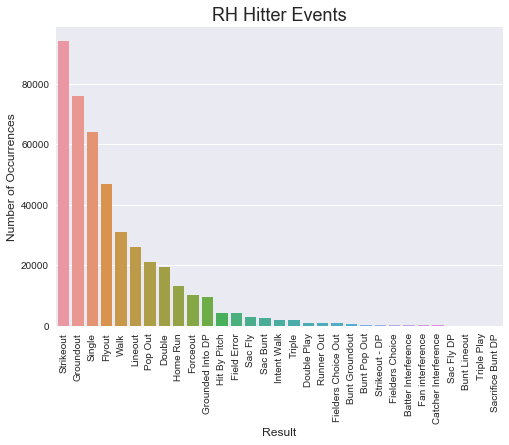

In [27]:
RH_inning_plays =atbatsR['event'].value_counts()
sns.set(style="darkgrid")
sns.barplot(RH_inning_plays.index, RH_inning_plays.values, alpha=1.0)
plt.title('RH Hitter Events', fontsize=18)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.xticks(rotation=90)
plt.show()

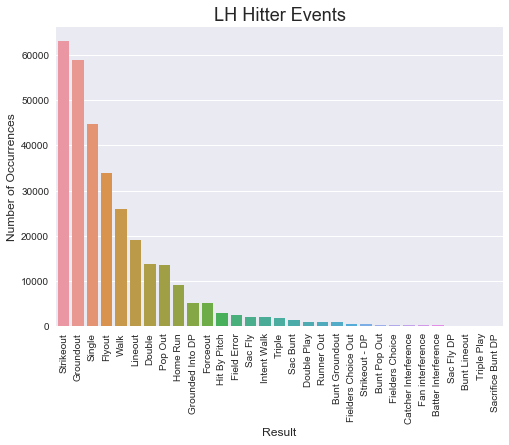

In [31]:
LH_inning_plays =atbatsL['event'].value_counts()
sns.set(style="darkgrid")
sns.barplot(LH_inning_plays.index, LH_inning_plays.values, alpha=1.0)
plt.title('LH Hitter Events', fontsize= 18)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.xticks(rotation=90)
plt.show()

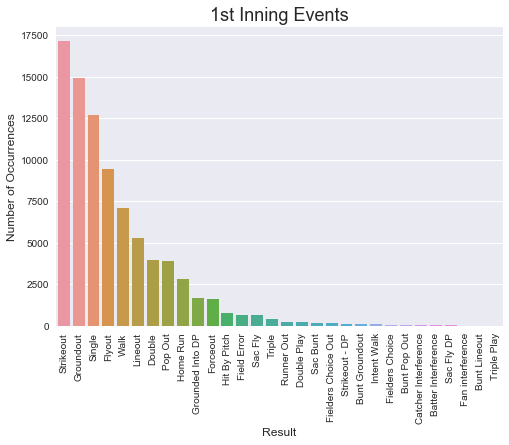

In [25]:
first_inning_plays =atbats1['event'].value_counts()
sns.set(style="darkgrid")
sns.barplot(first_inning_plays.index, first_inning_plays.values, alpha=1.0)
plt.title('1st Inning Events', fontsize=18)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.xticks(rotation=90)
plt.show()

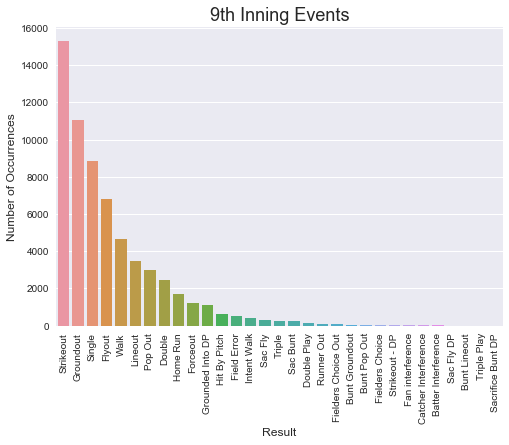

In [26]:
ninth_inning_plays =atbats9['event'].value_counts()
sns.set(style="darkgrid")
sns.barplot(ninth_inning_plays.index, ninth_inning_plays.values, alpha=1.0)
plt.title('9th Inning Events', fontsize=18)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.xticks(rotation=90)
plt.show()

I plotted the data to show the breakdown of events in both the first and ninth innings, and for LH and RH hitters. It is apparent through the visualization that strikeouts are more common in the ninth inning than in the first inning. This is due to closers being used in high leverage situations and their heightened ability to generate strikeouts

In [32]:
print (
np.sum(not_out1),
np.sum(not_out9),
np.sum(not_outR),
np.sum(not_outL))

28450 19433 139664 102142


In [33]:
print (
np.sum(not_out1),
np.sum(not_out9),
np.sum(not_outR),
np.sum(not_outL))

28450 19433 139664 102142


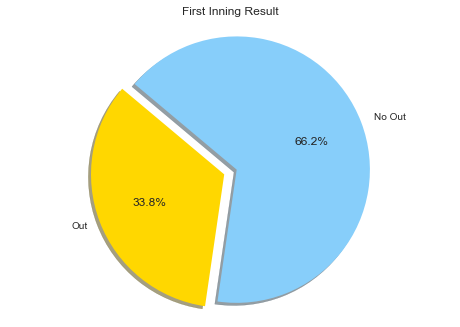

In [34]:
labels = 'Out', 'No Out'
sizes = [28450, 55699,]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0) 
plt.title ('First Inning Result')
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

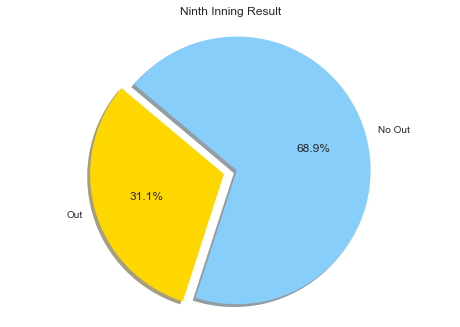

In [35]:
labels = 'Out', 'No Out'
sizes = [19433, 42983,]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0) 
plt.title ('Ninth Inning Result')
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

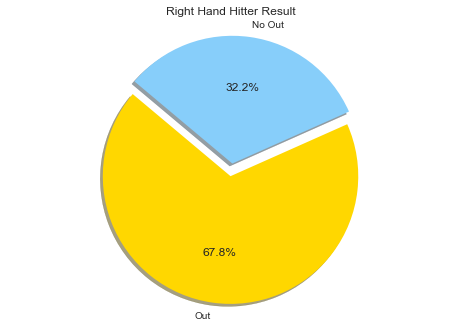

In [36]:
labels = 'Out', 'No Out'
sizes = [293766, 139664,]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0) 
plt.title ('Right Hand Hitter Result')
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

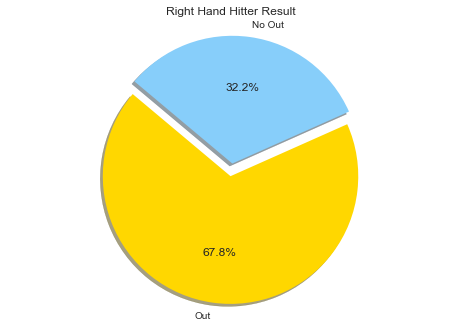

In [37]:
labels = 'Out', 'No Out'
sizes = [293766, 139664,]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0) 
plt.title ('Right Hand Hitter Result')
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

These pie charts visualize the On Base % means that I found earlier with the data

# File Source 2: API DATA - State GDP

In [39]:
from fredapi import Fred

In [42]:
fred = Fred(api_key="e12a9e0359f31b36e3f0aa5f0565a319")

In [43]:
ORgdp = fred.get_series("ORNGSP")
UTgdp = fred.get_series("UTNGSP")
IDgdp = fred.get_series("IDNGSP")
WAgdp = fred.get_series("WANGSP")
COgdp = fred.get_series("CONGSP")

In [44]:
ORgth = ORgdp.pct_change()
UTgth = UTgdp.pct_change()
IDgth = IDgdp.pct_change()
WAgth = WAgdp.pct_change()
COgth = COgdp.pct_change()

I am interested in seeing gdp growth rates in each state, hence the pct change feature

In [46]:
money = [ORgth, UTgth, IDgth, WAgth, COgth]
money_df = pd.concat(money, axis = 1)
print(money_df.head())

                   0         1         2         3         4
1997-01-01       NaN       NaN       NaN       NaN       NaN
1998-01-01  0.041857  0.079579  0.052478  0.084103  0.100284
1999-01-01  0.023164  0.059899  0.101804  0.096810  0.092066
2000-01-01  0.090305  0.064663  0.112912  0.031563  0.099732
2001-01-01  0.000140  0.041743 -0.016021  0.006702  0.038572


The reason there are no data for 1997 is because it is yearly growth rates and 1997 is the first year in the data set.

In [47]:
money_df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
dtype: object

In [48]:
money_df.rename(columns={0:'Oregon Growth', 1:'Utah Growth', 2:'Idaho Growth', 
                         3: 'Washington Growth', 4 :'Colorado Growth'}, 
                 index={0:'zero',1:'one'}, 
                 inplace=True)
print(money_df.head(4))

            Oregon Growth  Utah Growth  Idaho Growth  Washington Growth  \
1997-01-01            NaN          NaN           NaN                NaN   
1998-01-01       0.041857     0.079579      0.052478           0.084103   
1999-01-01       0.023164     0.059899      0.101804           0.096810   
2000-01-01       0.090305     0.064663      0.112912           0.031563   

            Colorado Growth  
1997-01-01              NaN  
1998-01-01         0.100284  
1999-01-01         0.092066  
2000-01-01         0.099732  


Renaming the columns to make the tables and graphs more intuitive later on.

In [49]:
money_df.isnull()

,Oregon Growth,Utah Growth,Idaho Growth,Washington Growth,Colorado Growth
1997-01-01,True,True,True,True,True
1998-01-01,False,False,False,False,False
1999-01-01,False,False,False,False,False
2000-01-01,False,False,False,False,False
2001-01-01,False,False,False,False,False
2002-01-01,False,False,False,False,False
2003-01-01,False,False,False,False,False
2004-01-01,False,False,False,False,False
2005-01-01,False,False,False,False,False
2006-01-01,False,False,False,False,False


As stated previously, the only area where there are no data is for 1997. I will simply drop the data from that year because the sample size is small and can vary easily, I do not want to use the mean or any other summary statistic to fill in for the missing values.

In [53]:
money1_df = money_df.dropna()

In [51]:
money1_df.describe()

,Oregon Growth,Utah Growth,Idaho Growth,Washington Growth,Colorado Growth
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.041776,0.054357,0.046518,0.051347,0.047830
std,0.028001,0.031363,0.035441,0.027823,0.030000
min,-0.027535,-0.022869,-0.031883,-0.005752,-0.027285
25%,0.023065,0.041297,0.030080,0.035878,0.034059
50%,0.041663,0.052810,0.043386,0.046786,0.038639
75%,0.056616,0.068392,0.058018,0.066651,0.063017
max,0.090305,0.126645,0.112912,0.096810,0.100284


The min and max are reasonable GDP growth rates, especially considering the dot.com boom of the late nineties and the Great Recession of the mid 2000's. The mean GDP growth also falls in line with what is to be expected.

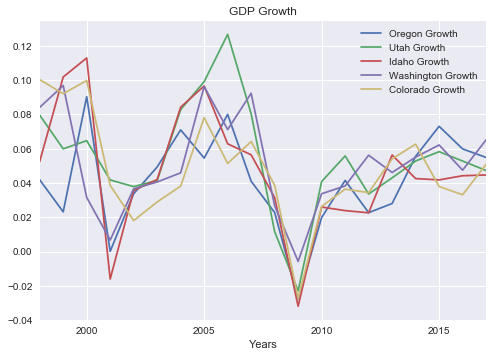

In [54]:
money1_df.plot()
plt.title("GDP Growth")
plt.xlabel("Years")
plt.show()

/Users/alexhumble/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


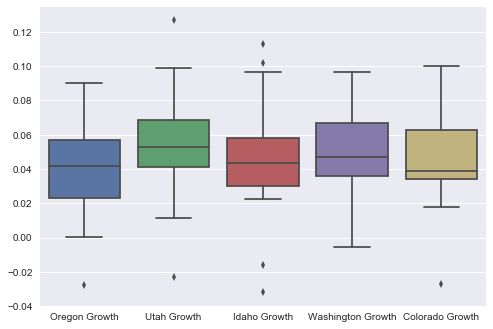

In [55]:
sns.boxplot(money1_df)
plt.show()

The boxplots do a great job of displaying the summary statistics from above. The inner quartile range reveals pretty consistent growth is common in most years between 3 and 6%

In [56]:
money1_df.corr()

,Oregon Growth,Utah Growth,Idaho Growth,Washington Growth,Colorado Growth
Oregon Growth,1.000000,0.724776,0.712551,0.440857,0.507535
Utah Growth,0.724776,1.000000,0.674729,0.709044,0.633675
Idaho Growth,0.712551,0.674729,1.000000,0.663037,0.776627
Washington Growth,0.440857,0.709044,0.663037,1.000000,0.687285
Colorado Growth,0.507535,0.633675,0.776627,0.687285,1.000000


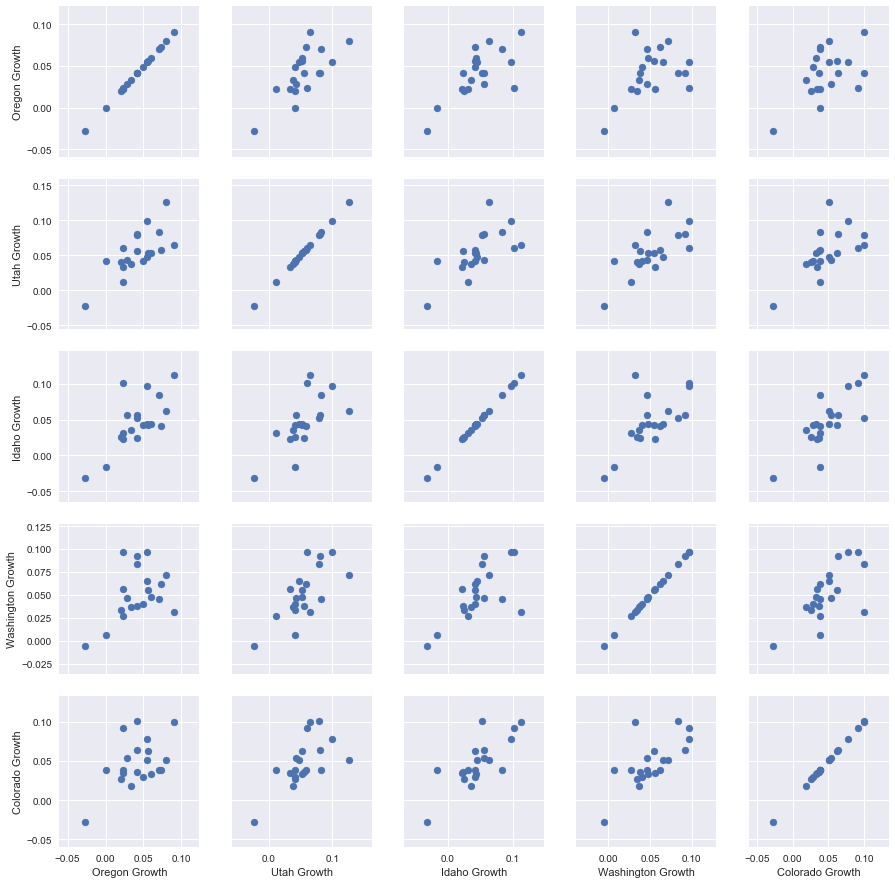

In [57]:
correlation = sns.PairGrid(money1_df)
correlation.map(plt.scatter)
plt.show()

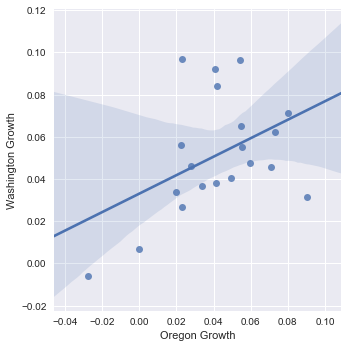

In [58]:
sns.lmplot(x="Oregon Growth", y="Washington Growth", data=money1_df)
plt.show()

It is interesting to note the stronger covariance between Oregon and Utah than Oregon and Washington. I would have expected that bordering states in similar geographical regions would have higher covariances than those of states in different geographical regions such as Utah and Oregon.

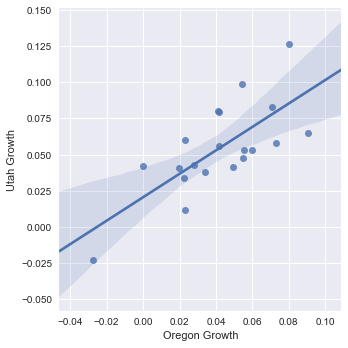

In [59]:
sns.lmplot(x="Oregon Growth", y="Utah Growth", data=money1_df)
plt.show()

Variance in Utah GDP Growth


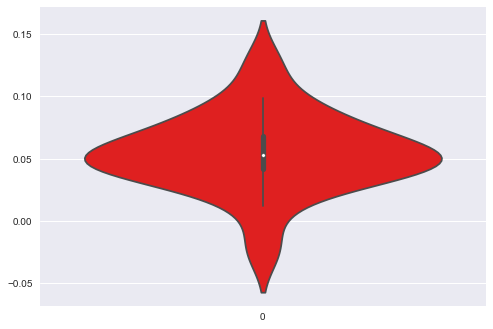

In [60]:
print('Variance in Utah GDP Growth')
sns.violinplot(data = money1_df['Utah Growth'], color = 'red')
plt.show()

Variance in Oregon GDP Growth


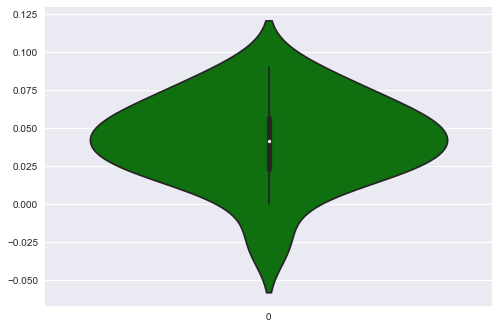

In [61]:
print('Variance in Oregon GDP Growth')
sns.violinplot(data = money1_df['Oregon Growth'], color = 'Green')
plt.show()

Variance in Colorado GDP Growth


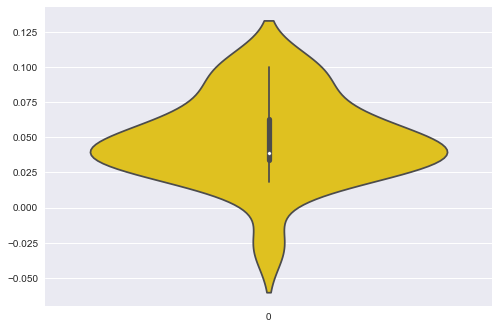

In [62]:
print('Variance in Colorado GDP Growth')
sns.violinplot(data = money1_df['Colorado Growth'], color = 'gold')
plt.show()

Variance in Washington GDP Growth


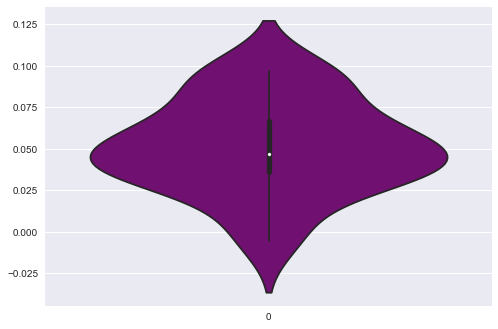

In [64]:
print('Variance in Washington GDP Growth')
sns.violinplot(data = money1_df['Washington Growth'], color = 'Purple')
plt.show()

Variance in Idaho GDP Growth


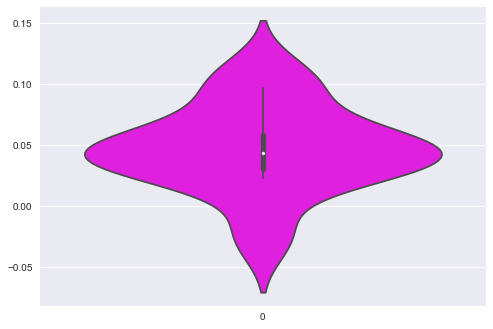

In [65]:
print('Variance in Idaho GDP Growth')
sns.violinplot(data = money1_df['Idaho Growth'], color = 'Magenta')
plt.show()

The violin plots show that the variance of each state's gdp growth ratea are pretty similar. This is no surprise given the covariance between each state's gdp growth. Furthermore, it shows that all states GDP growth rates are single mode variables.

# File Source 3: JSON Data - Pokemon

In [71]:
import urllib.request, json 
from pandas.io.json import json_normalize
import json
import requests
with urllib.request.urlopen("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json") as url:
    data = json.loads(url.read().decode())
    print(data)

{'pokemon': [{'id': 1, 'num': '001', 'name': 'Bulbasaur', 'img': 'http://www.serebii.net/pokemongo/pokemon/001.png', 'type': ['Grass', 'Poison'], 'height': '0.71 m', 'weight': '6.9 kg', 'candy': 'Bulbasaur Candy', 'candy_count': 25, 'egg': '2 km', 'spawn_chance': 0.69, 'avg_spawns': 69, 'spawn_time': '20:00', 'multipliers': [1.58], 'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'], 'next_evolution': [{'num': '002', 'name': 'Ivysaur'}, {'num': '003', 'name': 'Venusaur'}]}, {'id': 2, 'num': '002', 'name': 'Ivysaur', 'img': 'http://www.serebii.net/pokemongo/pokemon/002.png', 'type': ['Grass', 'Poison'], 'height': '0.99 m', 'weight': '13.0 kg', 'candy': 'Bulbasaur Candy', 'candy_count': 100, 'egg': 'Not in Eggs', 'spawn_chance': 0.042, 'avg_spawns': 4.2, 'spawn_time': '07:00', 'multipliers': [1.2, 1.6], 'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'], 'prev_evolution': [{'num': '001', 'name': 'Bulbasaur'}], 'next_evolution': [{'num': '003', 'name': 'Venusaur'}]}, {'id': 3, 'num': '003'

In [73]:
get_request = requests.get("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json")

In [74]:
get_request.text

'{\n  "pokemon": [{\n    "id": 1,\n    "num": "001",\n    "name": "Bulbasaur",\n    "img": "http://www.serebii.net/pokemongo/pokemon/001.png",\n    "type": [\n      "Grass",\n      "Poison"\n    ],\n    "height": "0.71 m",\n    "weight": "6.9 kg",\n    "candy": "Bulbasaur Candy",\n    "candy_count": 25,\n    "egg": "2 km",\n    "spawn_chance": 0.69,\n    "avg_spawns": 69,\n    "spawn_time": "20:00",\n    "multipliers": [1.58],\n    "weaknesses": [\n      "Fire",\n      "Ice",\n      "Flying",\n      "Psychic"\n    ],\n    "next_evolution": [{\n      "num": "002",\n      "name": "Ivysaur"\n    }, {\n      "num": "003",\n      "name": "Venusaur"\n    }]\n  }, {\n    "id": 2,\n    "num": "002",\n    "name": "Ivysaur",\n    "img": "http://www.serebii.net/pokemongo/pokemon/002.png",\n    "type": [\n      "Grass",\n      "Poison"\n    ],\n    "height": "0.99 m",\n    "weight": "13.0 kg",\n    "candy": "Bulbasaur Candy",\n    "candy_count": 100,\n    "egg": "Not in Eggs",\n    "spawn_chance":

In [76]:
pokemon_dict.keys()

dict_keys(['pokemon'])

In [77]:
pokemon_dict['pokemon']

pokedex = pd.Series(pokemon_dict['pokemon'])

pokedex.head()

list(pokedex)

df = pd.DataFrame.from_dict(json_normalize(data['pokemon']), orient = 'columns')
print(df)

     avg_spawns                     candy  candy_count            egg  height  \
0        69.000           Bulbasaur Candy         25.0           2 km  0.71 m   
1         4.200           Bulbasaur Candy        100.0    Not in Eggs  0.99 m   
2         1.700           Bulbasaur Candy          NaN    Not in Eggs  2.01 m   
3        25.300          Charmander Candy         25.0           2 km  0.61 m   
4         1.200          Charmander Candy        100.0    Not in Eggs  1.09 m   
5         0.310          Charmander Candy          NaN    Not in Eggs  1.70 m   
6        58.000            Squirtle Candy         25.0           2 km  0.51 m   
7         3.400            Squirtle Candy        100.0    Not in Eggs  0.99 m   
8         0.670            Squirtle Candy          NaN    Not in Eggs  1.60 m   
9       303.200            Caterpie Candy         12.0           2 km  0.30 m   
10       18.700            Caterpie Candy         50.0    Not in Eggs  0.71 m   
11        2.200            C

After struggling for a bit, I was able to format my JSON data and put the dictionary values in as a DF. This arranges my data how I need it in order to analyze it.

In [78]:
df.isnull()

,avg_spawns,candy,candy_count,egg,height,id,img,multipliers,name,next_evolution,num,prev_evolution,spawn_chance,spawn_time,type,weaknesses,weight
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


The null values are actually not an issue with this data set. They are telling of the type of pokemon. For example, pokemon who are the fully evolved stage cannot evolve further and thus this value is null. Furthermore, that pokemon cannot benefit from rare candys, etc.

Usually null values could be an issue in a data set, but in this case they are informative.

In [79]:
ash = df[['name', 'weight', 'weaknesses']]
dtype
print(ash)

                   name    weight                             weaknesses
0             Bulbasaur    6.9 kg           [Fire, Ice, Flying, Psychic]
1               Ivysaur   13.0 kg           [Fire, Ice, Flying, Psychic]
2              Venusaur  100.0 kg           [Fire, Ice, Flying, Psychic]
3            Charmander    8.5 kg                  [Water, Ground, Rock]
4            Charmeleon   19.0 kg                  [Water, Ground, Rock]
5             Charizard   90.5 kg                [Water, Electric, Rock]
6              Squirtle    9.0 kg                      [Electric, Grass]
7             Wartortle   22.5 kg                      [Electric, Grass]
8             Blastoise   85.5 kg                      [Electric, Grass]
9              Caterpie    2.9 kg                   [Fire, Flying, Rock]
10              Metapod    9.9 kg                   [Fire, Flying, Rock]
11           Butterfree   32.0 kg    [Fire, Electric, Ice, Flying, Rock]
12               Weedle    3.2 kg          [Fire, F

I am interested in seeing how weight relates with weaknesses of pokemon, so I created a new data frame omitting the columns that were not of interest to me.

In [80]:
[float(w.split()[0]) for w in ash.weight]

[6.9,
 13.0,
 100.0,
 8.5,
 19.0,
 90.5,
 9.0,
 22.5,
 85.5,
 2.9,
 9.9,
 32.0,
 3.2,
 10.0,
 29.5,
 1.8,
 30.0,
 39.5,
 3.5,
 18.5,
 2.0,
 38.0,
 6.9,
 65.0,
 6.0,
 30.0,
 12.0,
 29.5,
 7.0,
 20.0,
 60.0,
 9.0,
 19.5,
 62.0,
 7.5,
 40.0,
 9.9,
 19.9,
 5.5,
 12.0,
 7.5,
 55.0,
 5.4,
 8.6,
 18.6,
 5.4,
 29.5,
 30.0,
 12.5,
 0.8,
 33.3,
 4.2,
 32.0,
 19.6,
 76.6,
 28.0,
 32.0,
 19.0,
 155.0,
 12.4,
 20.0,
 54.0,
 19.5,
 56.5,
 48.0,
 19.5,
 70.5,
 130.0,
 4.0,
 6.4,
 15.5,
 45.5,
 55.0,
 20.0,
 105.0,
 300.0,
 30.0,
 95.0,
 36.0,
 78.5,
 6.0,
 60.0,
 15.0,
 39.2,
 85.2,
 90.0,
 120.0,
 30.0,
 30.0,
 4.0,
 132.5,
 0.1,
 0.1,
 40.5,
 210.0,
 32.4,
 75.6,
 6.5,
 60.0,
 10.4,
 66.6,
 2.5,
 120.0,
 6.5,
 45.0,
 49.8,
 50.2,
 65.5,
 1.0,
 9.5,
 115.0,
 120.0,
 34.6,
 35.0,
 80.0,
 8.0,
 25.0,
 15.0,
 39.0,
 34.5,
 80.0,
 54.5,
 56.0,
 40.6,
 30.0,
 44.5,
 55.0,
 88.4,
 10.0,
 235.0,
 220.0,
 4.0,
 6.5,
 29.0,
 24.5,
 25.0,
 36.5,
 7.5,
 35.0,
 11.5,
 40.5,
 59.0,
 460.0,
 55.4,
 52.6,
 60.0,
 

This enabled me to use weight as an integer instead of keeping it as a string value

In [81]:
weight = [float(w.split()[0]) for w in ash.weight]

In [82]:
ash.weaknesses

0               [Fire, Ice, Flying, Psychic]
1               [Fire, Ice, Flying, Psychic]
2               [Fire, Ice, Flying, Psychic]
3                      [Water, Ground, Rock]
4                      [Water, Ground, Rock]
5                    [Water, Electric, Rock]
6                          [Electric, Grass]
7                          [Electric, Grass]
8                          [Electric, Grass]
9                       [Fire, Flying, Rock]
10                      [Fire, Flying, Rock]
11       [Fire, Electric, Ice, Flying, Rock]
12             [Fire, Flying, Psychic, Rock]
13             [Fire, Flying, Psychic, Rock]
14             [Fire, Flying, Psychic, Rock]
15                          [Electric, Rock]
16                          [Electric, Rock]
17                          [Electric, Rock]
18                                [Fighting]
19                                [Fighting]
20                          [Electric, Rock]
21                          [Electric, Rock]
22        

In [83]:
[len(weaknesses) for weaknesses in ash.weaknesses]

[4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 5,
 4,
 4,
 4,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 4,
 2,
 2,
 4,
 1,
 1,
 3,
 3,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 4,
 4,
 3,
 3,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 6,
 6,
 6,
 3,
 3,
 5,
 5,
 3,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 6,
 3,
 3,
 2,
 2,
 1,
 1,
 7,
 7,
 3,
 3,
 3,
 3,
 1,
 2,
 2,
 6,
 6,
 1,
 5,
 1,
 2,
 2,
 2,
 2,
 2,
 5,
 3,
 5,
 6,
 1,
 3,
 3,
 1,
 2,
 2,
 4,
 1,
 1,
 2,
 1,
 3,
 1,
 4,
 4,
 4,
 4,
 5,
 1,
 4,
 2,
 3,
 3,
 3,
 4,
 3,
 3]

In [84]:
num_weaknesses = [len(weaknesses) for weaknesses in ash.weaknesses]

In [85]:
oaks = [i for i in zip(num_weaknesses, weight)]
labels = ['Number of Weaknesses', 'Weight (kg)']
df1 = pd.DataFrame.from_records(oaks, columns=labels)

In [86]:
df1.head()

,Number of Weaknesses,Weight (kg)
0,4,6.9
1,4,13.0
2,4,100.0
3,3,8.5
4,3,19.0


This created a new df with integer values for the weight of the pokemon and the number of weaknesses that they have. This was the final step needed in order to check and visualize the covariances.

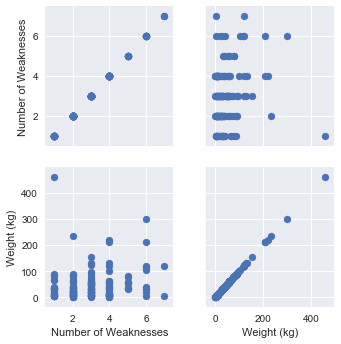

In [87]:
correlation = sns.PairGrid(df1)
correlation.map(plt.scatter)
plt.show()

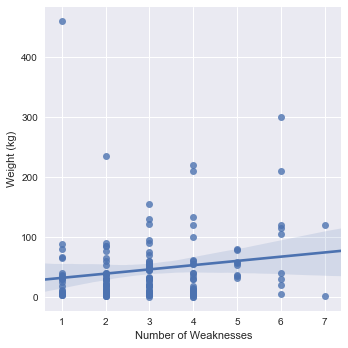

In [88]:
sns.lmplot(x="Number of Weaknesses", y="Weight (kg)", data=df1)
plt.show()

Interestingly enough, the number of weaknesses is not really correlated with the weight of the pokemon. That is why it is important for each trainer to know their pokemon well and not just guess off of size.